In [320]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

In [321]:
data = load_breast_cancer()
data.data.shape

(569, 30)

In [322]:
xtrain, xtest, ytrain, ytest = train_test_split(data.data,data.target,test_size=0.2)

In [323]:
# parameter C is determined by learning curve
LRl1 = LR(penalty='l1',solver='liblinear',C=0.8,max_iter=1000)
cross_val_score(LRl1,data.data,data.target,cv=5).mean()

0.9509041939207385

In [324]:
##using l1 logistic regression to select features (embedded technique)
selector = SelectFromModel(LRl1,norm_order=1)
x_embedded = selector.fit_transform(xtrain,ytrain)
x_embedded.shape

(455, 9)

In [325]:
selector.get_support()

array([ True, False,  True,  True, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False,  True,  True,  True, False, False,  True,
       False, False, False])

In [326]:
#cross validation score
cross_val_score(LRl1,x_embedded,ytrain,cv=5).mean()

0.9517184265010352

In [327]:
LRl1.fit(x_embedded,ytrain)

LogisticRegression(C=0.8, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [328]:
#test score
accuracy_score(LRl1.predict(xtest[:,selector.get_support()]),ytest)

0.9385964912280702

In [329]:
LRl2 = LR(penalty='l2',solver='liblinear',C=0.8,max_iter=1000)
cross_val_score(LRl2,data.data,data.target,cv=5).mean()

0.9509041939207385

In [330]:
pd.DataFrame(abs(LRl2.fit(data.data,data.target).coef_).reshape(-1,1)).describe()

,0
count,30.000000
mean,0.362624
std,0.504849
min,0.003473
25%,0.029904
50%,0.122230
75%,0.527143
max,1.940719


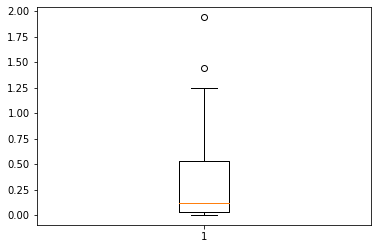

In [331]:
plt.figure()
plt.boxplot(pd.DataFrame(abs(LRl2.fit(data.data,data.target).coef_)))
plt.show()

In [332]:
##learning curve: using coefficients of l2 logistic regression to select features 

In [333]:
thresholds = np.linspace(0,abs(LRl2.fit(data.data,data.target).coef_).max()*0.8,40)

In [334]:
score_cv=[]
score_test=[]
n_features=[]

for threshold in thresholds:
    selector = SelectFromModel(LRl2,threshold=threshold)
    x_embedded = selector.fit_transform(xtrain,ytrain)
    score_cv.append(cross_val_score(LRl2,x_embedded,ytrain,cv=5).mean())
    LRl2.fit(x_embedded,ytrain)
    score_test.append(accuracy_score(LRl2.predict(xtest[:,selector.get_support()]),ytest))
    n_features.append(selector.get_support().sum())

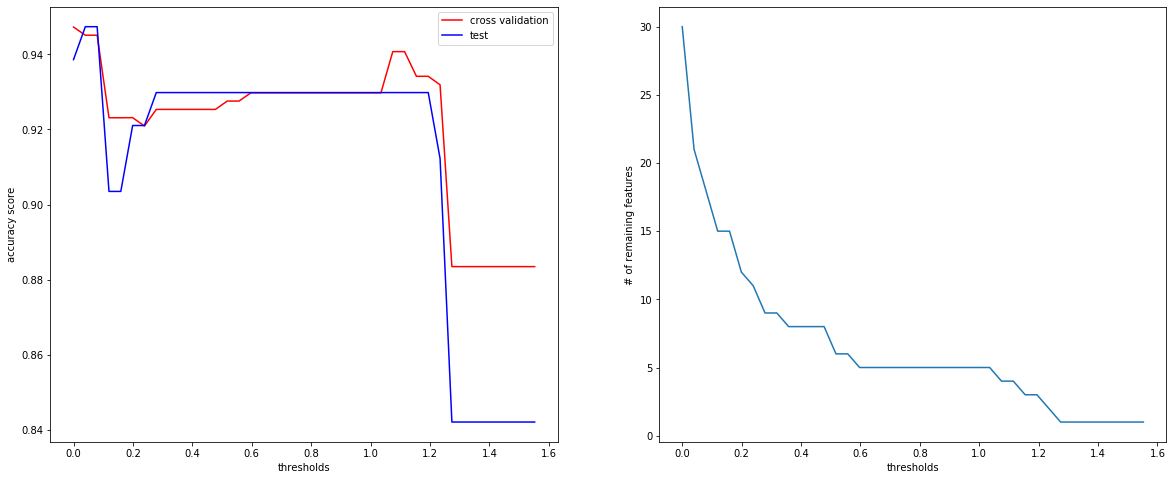

In [335]:
plt.figure(figsize=[20,8])
plt.subplot(1,2,1)
plt.plot(thresholds,score_cv,c='red',label='cross validation')
plt.plot(thresholds,score_test,c='blue',label='test')
plt.xlabel('thresholds')
plt.ylabel('accuracy score')
plt.legend()

plt.subplot(1,2,2)
plt.plot(thresholds,n_features)
plt.xlabel('thresholds')
plt.ylabel('# of remaining features')
plt.show()